# Discusion Tarea 1
# Maximum Likelihood Estimator (MLE): Estimador de maxima verosimilitud.

Dado un vector de parametros $\theta =(\theta_1, \theta_2, \cdots, \theta_m) \in \mathbb{R}^m$ y un cocnjunto de datos (variable aleatoria)
$X=(x_1, x_2, \cdots, x_n) \in \mathbb{R}^n$ queremos construir
lo que se llama **likelihood function** (funcion de vereosimilitud) como

$$ \mathcal{L}(\theta | x) = p_{\theta}(x) = P_{\theta}(X=x) $$.
Aca $\theta$ es un vector de parametros de la variable aleatoria $X$ . Definimos la funcion de densidad de esta variable aleatoria con respecto a los parametros $\theta$ como
$p(x | \theta)$ y el Likelihood como:


$$ \mathcal{L}(\theta | x ) = p(x | \theta) $$.
La estadistica que nosotros usamos en este curso es **parametrica**. Si las observaciones $x_i$ son independientes
entonces

$$ \mathcal{L}(\theta | x) = \prod_{i=1}^n p(x_i | \theta)  $$

Es comun que en vez del likelihood se use el negativo del logaritmo del likelihood (recuerden en el curso de ML).

$$ LLF = - \log \mathcal{L}(\theta, x)  $$

Por que esta expresion:

* El signo "-" es por que nos sentimos mejor minizando que maximizando y lo que queremos es maximicar $\mathcal{L}$. 
* Por que el logaritmo.
    * Por que los numeros  $p(x_i | \theta)$ son menores que uno y una productoria muy grande los vuelve un numero muy pequeno que puede pasar a ser **underflow**
    * Tomar la derivada de una suma es mucho mas facil que tomar la derivada de un producto. La suma de estos numeros no sufre del problema de reducirse a un numero muy pequeno. La suma, preserva mejor, el tamano del resultado. La multiplicacion lo hace cada vez mas pequeno (para numeros entre 0 y 1).

    




**Ejemplo**: Asuma los datos $x=(x_1, x_2, \cdots, x_n)$ los cuales se ajustan a una distribucion normal con los parametros $\theta=(\mu, \sigma^2)$.  Asumamos tambien que los eventoss son IID: **Idendependientes y identiamente distribuitos** Sabemos que
la probabilidad de todos ellos es el producto de la probabildad de cada uno. 

$$ \mathcal{L}(\theta | x) = \mathcal{N}(\mu, \sigma^2) = 
\frac{1}{\sqrt{(2 \pi \sigma^2)^n}} \prod_{i=1}^n \exp \left (- \frac{(x_i - \mu)^2}{2 \sigma^2} \right ) .$$



Calculemos el LLF como una funcion de costo

$$C(\theta) = LLF(\theta, x) = \frac12  n \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2}  \sum_{i=1}^n (x_i - \mu)^2 $$

Curiosamente, el segundo termino nos recuerda **minimos cuadrados**.

Pensamos en optimizacion y queremos hallar el minimo de la funcion de costo. Analiticamente esto se con calculo en varias variables.
En este caso son dos variables $\theta=(\theta_1, \theta_2)=(\mu , \sigma^2)$. Tomanos la derivada y la igualamos a 04

$$ \frac{\partial C(\theta)}{\partial \theta_1} = -\frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) =\frac{1}{\sigma^2} \left ( \sum_{i=1}^n x_i - n \mu \right ) = 0$$

Vamos a despejar $\hat{\mu} = \frac1n \sum_{i=1}^n x_i$.
Le pongo el sombrero $\hat{mu}$ para no confundirlo con el parametro $\theta_1=\mu$ original de los datos. 



Estimemos el segundo parametro $\hat{\sigma^2}$ la varianza estimada.

Tomamos la derivada con respecto a $\sigma^2$.

$$\frac{\partial C(\theta)}{\partial \theta_2} = \frac{1}{2n} \frac{2 \pi}{2 \pi \sigma^2}  - \frac{1}{2 \sigma^4} \sum_{i=1}^n  (x_i - \mu)^2 = 0 $$

Debemos despejar $\sigma^2$. Multiplicamos todo por $2 \sigma^4$ y despejamos $\sigma^2$.

$$ \hat{\sigma^2} = \frac1n \sum_{i=1}^n (x_i - \mu)^2 $$

Esta es la varianza. Pero **ojo** es un **biased estimator**.

[La pagina](https://en.wikipedia.org/wiki/Bias_of_an_estimator) muestra
que para la varianza no tenga un sesgo (bias) la formula debe ser:

$$ \hat{\sigma^2} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu)^2 $$




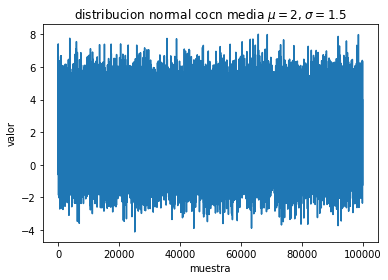

In [2]:
# calculamos los estimadores por 3 metodos distintos
# directamente de la definicion, usando python regular
# usando NumPY.

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

mu = 2.0
sigma = 1.5
N=100000

# generemos una distribucion normal
data = np.random.randn(N)*sigma + mu

# graficar
plt.xlabel("muestra")
plt.ylabel("valor")
plt.title("distribucion normal cocn media $\mu=2$, $\sigma=1.5$")
plt.plot(data)
plt.show()

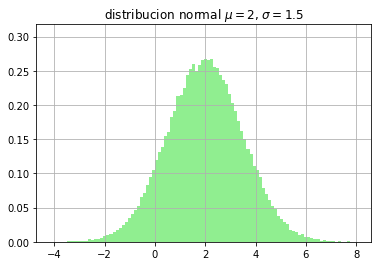

In [12]:
# extraemos histograma

hx, _, _ =  plt.hist(data, bins=100, density=1, color="lightgreen")

plt.ylim(0.0, max(hx) + 0.05)
plt.title("distribucion normal $\mu=2$, $\sigma=1.5$")
plt.grid()
plt.show()

Recerde el  LLF

$$ LLF = - \sum_{i=1}^n \log p(x_i, \theta)$$

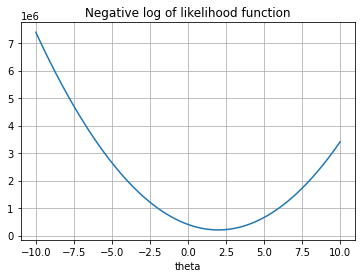

In [10]:
# definimos una suite de posibles parametros
x = np.linspace(-10, 10, 1000)

y=[]
for i in x:
    y.append( -np.log( scipy.stats.norm.pdf(data,i)).sum())

# grafiquemos

plt.plot(x, y)

plt.title("Negative log of likelihood function")
plt.xlabel("theta")
plt.grid()

plt.show()

In [11]:
# encontremos el MSE for the mean
y_min = y.index(min(y))
print("lal media estimadad dele LLF es ", x[y_min])

lal media estimadad dele LLF es  1.9919919919919913


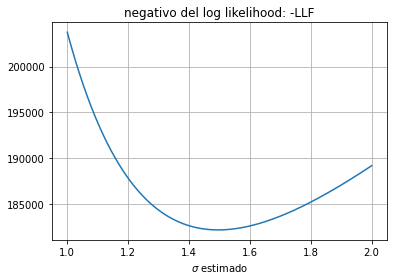

In [15]:
# estimemos ahorar la varianza
x = np.linspace(1,2, 1000)

y=[]
for i in x:
    y.append(-np.log(scipy.stats.norm.pdf(data, 2.0, i)).sum())

plt.plot(x,y)
plt.title("negativo del log likelihood: -LLF")
plt.xlabel("$\sigma$ estimado")
plt.grid()
plt.show()

In [16]:
# calcumemos el minimo usando python puro
y_min = y.index(min(y))
print("la desviacion estandard estimada es", x[y_min])

la desviacion estandard estimada es 1.4954954954954955


In [18]:
# otras dos formas de estimar estos valores
# como sabemos que los datos son Gaussianos, 
# usamos lo que probamos arriba.
m = len(data)
mean = sum(data)/m
std = np.sqrt( sum( (data - mean)**2)/m)

print("media=%f y la desviacion estandard=%f directamente de las muestras" %(mean, std))

media=1.992811 y la desviacion estandard=1.495753 directamente de las muestras


In [19]:
# por ultimo usando NumPy
mean = np.mean(data)
std = np.std(data)
print("media=%f y la desviacion estandard=%f directamente de las muestras con NumPY" %(mean, std))

media=1.992791 y la desviacion estandard=1.495745 directamente de las muestras con NumPY
